# **Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

## **Initializations and Import Files**

In [ ]:
feature_url = 'https://raw.githubusercontent.com/MingchengHe/4AI3_Project/main/features.csv'
feature = pd.read_csv(feature_url)
store_url = 'https://raw.githubusercontent.com/MingchengHe/4AI3_Project/main/stores.csv'
store = pd.read_csv(store_url)
te_url = 'https://raw.githubusercontent.com/MingchengHe/4AI3_Project/main/test.csv'
te = pd.read_csv(te_url)
tr_url = 'https://raw.githubusercontent.com/MingchengHe/4AI3_Project/main/train.csv'
tr = pd.read_csv(tr_url)
sample_url = 'https://raw.githubusercontent.com/MingchengHe/4AI3_Project/main/sampleSubmission.csv'
sample = pd.read_csv(sample_url)

In [ ]:
def plot_histo(df, bins, title, xlabel):
  plt.hist(df, bins = bins)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.show()

# **Store**

In [ ]:
store.describe

<bound method NDFrame.describe of     Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321


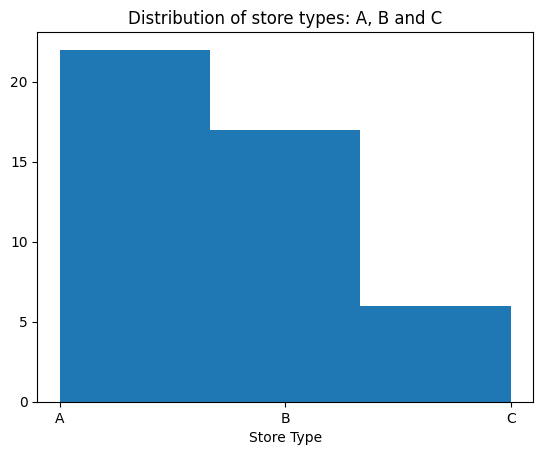

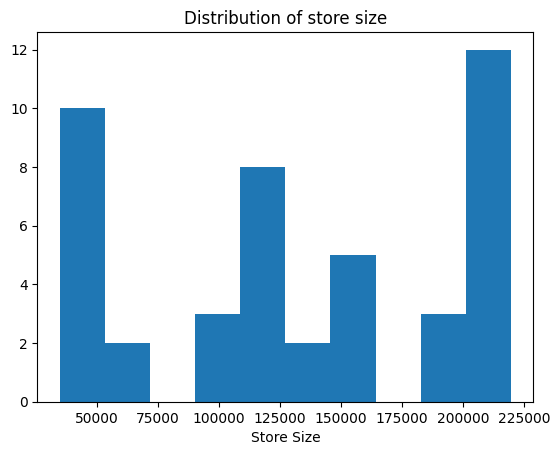

In [ ]:
plot_histo(store['Type'], 3, 'Distribution of store types: A, B and C', 'Store Type')
plot_histo(store['Size'], 10, 'Distribution of store size', 'Store Size')

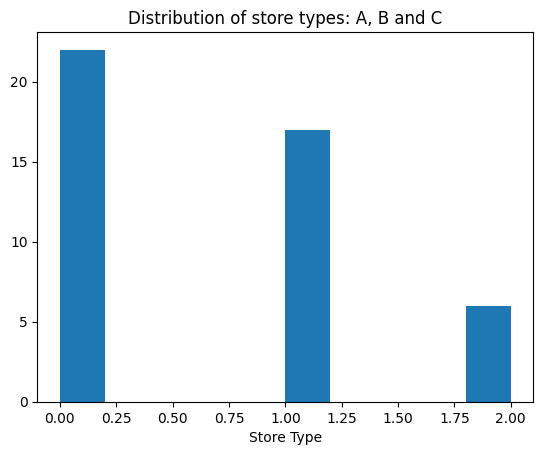

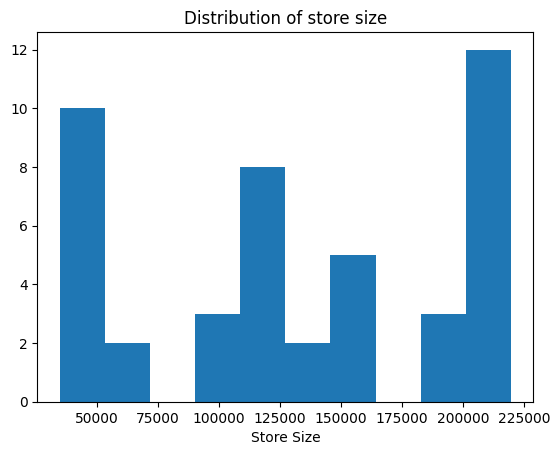

In [ ]:
store['Type'] = store['Type'].replace('A', 0)
store['Type'] = store['Type'].replace('B', 1)
store['Type'] = store['Type'].replace('C', 2)

plot_histo(store['Type'], 10, 'Distribution of store types: A, B and C', 'Store Type')
plot_histo(store['Size'], 10, 'Distribution of store size', 'Store Size')

# **Feature and Merging: Handling testing dataset**

Feature and Store will need to be merged first. The resulting dataset will be merged with Train and Test dataset separately.

In [ ]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
feature['IsHoliday'] = feature['IsHoliday'].replace(True, 1)
feature['IsHoliday'] = feature['IsHoliday'].replace(False, 0)
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,0
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,0
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,0
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,0


In [ ]:
te_merged = pd.merge(te, feature, on=['Store', 'Date', 'IsHoliday'])
te_merged = pd.merge(te_merged, store, on='Store')
te_merged

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,118221


# **Feature and Merging: Handling training dataset**

Feature and Store will need to be merged first. The resulting dataset will be merged with Train and Test dataset separately.

In [ ]:
to_be_checked_list = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']
for to_be_checked in to_be_checked_list:
  print(to_be_checked, feature[feature[to_be_checked].isna()].shape[0])

MarkDown1 4158
MarkDown2 5269
MarkDown3 4577
MarkDown4 4726
MarkDown5 4140
CPI 585
Unemployment 585


In [ ]:
tr_merged = pd.merge(tr, feature, on=['Store', 'Date', 'IsHoliday'])
tr_merged = pd.merge(tr_merged, store, on='Store')
tr_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221


# **Further Visualization and Preprocessing of Training dataset**

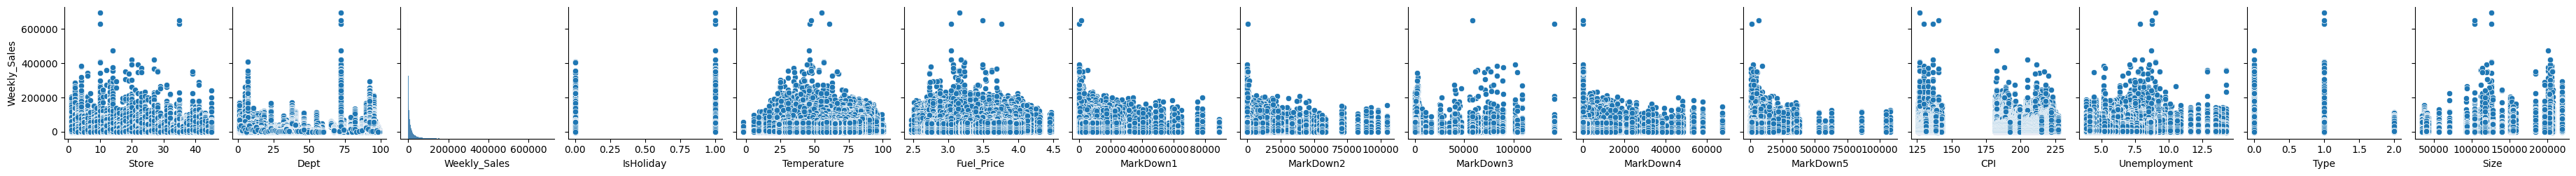

In [ ]:
sns.pairplot(
    tr_merged,
    y_vars=["Weekly_Sales"],
)

Weekly Sales is very skewed.

The other columns is balanced.

In [ ]:
print(tr_merged['Dept'].loc[tr_merged['Weekly_Sales'] == tr_merged['Weekly_Sales'].max()])
print(tr_merged['Weekly_Sales'].max())

90645    72
Name: Dept, dtype: int64
693099.36


In [ ]:
tr_merged['IsHoliday'] = tr_merged['IsHoliday'].replace(True, 1)
tr_merged['IsHoliday'] = tr_merged['IsHoliday'].replace(False, 0)
tr_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221


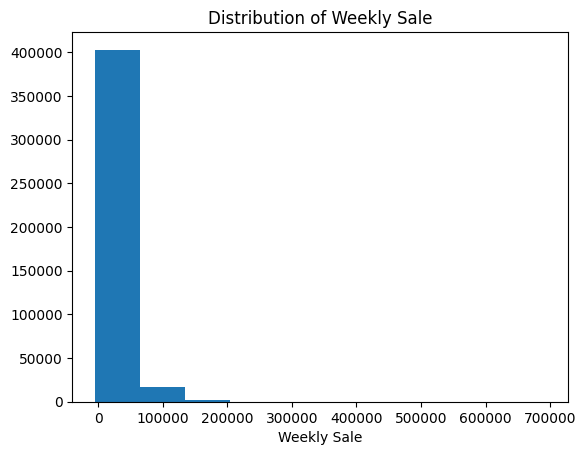

In [ ]:
plt.hist(tr_merged['Weekly_Sales'])
plt.title('Distribution of Weekly Sale')
plt.xlabel('Weekly Sale')
plt.show()

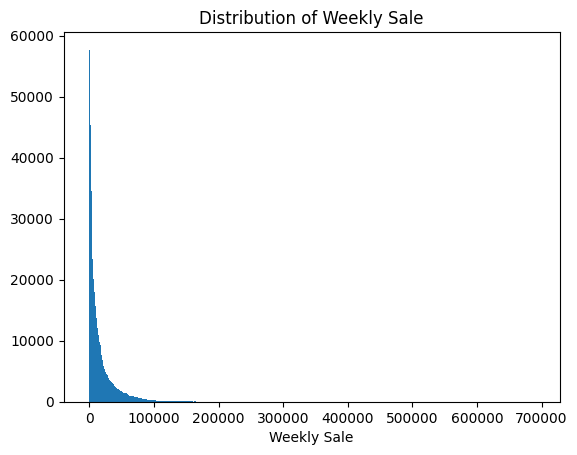

In [ ]:
plt.hist(tr_merged['Weekly_Sales'], bins = 500)
plt.title('Distribution of Weekly Sale')
plt.xlabel('Weekly Sale')
plt.show()

Outlier: https://medium.com/@arsalan_zafar/handling-outliers-in-pandas-5cd872eef508

<Axes: ylabel='Weekly_Sales'>

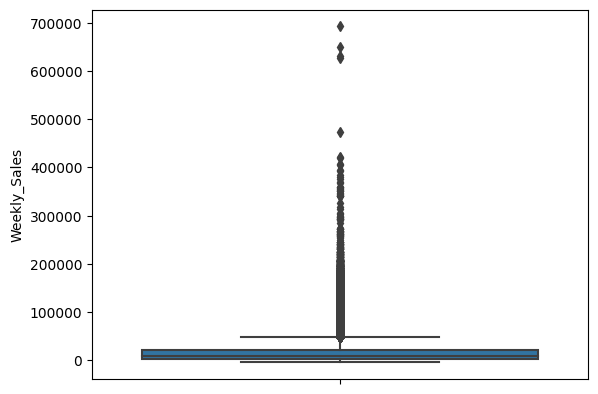

In [ ]:
sns.boxplot(y=tr_merged['Weekly_Sales'])

In [ ]:
upper = tr_merged['Weekly_Sales'].mean() + 3 * tr_merged['Weekly_Sales'].std()
lower = tr_merged['Weekly_Sales'].mean() - 3 * tr_merged['Weekly_Sales'].std()
print(upper, lower)

84114.80868095672 -52152.292434022645


In [ ]:
print('Upper: ', tr_merged['Weekly_Sales'].loc[tr_merged['Weekly_Sales'] >= upper].shape[0])
print('Lower: ', tr_merged['Weekly_Sales'].loc[tr_merged['Weekly_Sales'] <= lower].shape[0])

Upper:  8848
Lower:  0


In [ ]:
tr_final = tr_merged.drop(tr_merged[tr_merged.Weekly_Sales >= upper].index)
tr_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221


<Axes: ylabel='Weekly_Sales'>

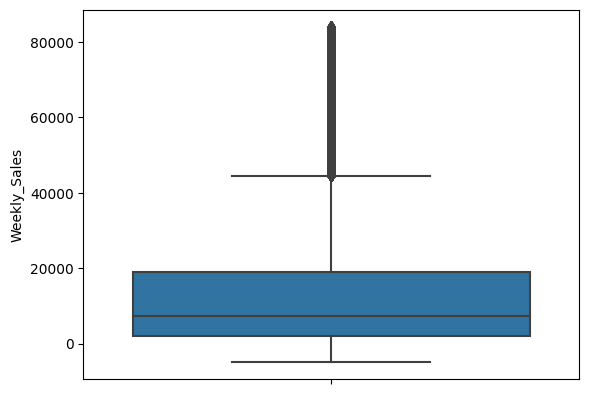

In [ ]:
sns.boxplot(y=tr_final['Weekly_Sales'])

Skewed: https://supercelestial.medium.com/data-transformation-of-positively-skewed-dataset-55a8e1822380

0    1285
dtype: int64


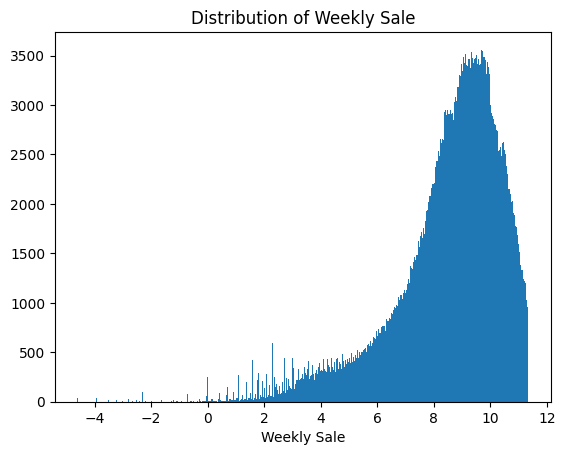

In [ ]:
df = pd.DataFrame(st.boxcox(tr_final['Weekly_Sales'].loc[tr_final['Weekly_Sales'] != 0], lmbda=0))
print(pd.DataFrame(st.boxcox(tr_final['Weekly_Sales'].loc[tr_final['Weekly_Sales'] != 0], lmbda=0)).isnull().sum())

tr_final['Weekly_Sales_transformed'] = st.boxcox(tr_final['Weekly_Sales'], lmbda=0)
tr_final['Weekly_Sales_transformed'] = tr_final['Weekly_Sales_transformed'].replace(-np.inf, 0)
plt.hist(tr_final['Weekly_Sales_transformed'], bins = 500)
plt.title('Distribution of Weekly Sale')
plt.xlabel('Weekly Sale')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Weekly_Sales    1285
dtype: int64


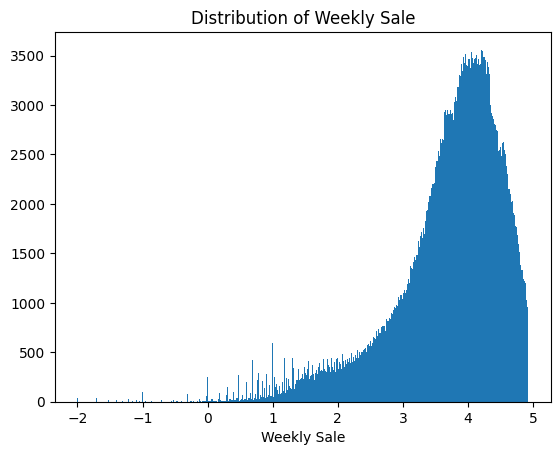

In [ ]:
df = pd.DataFrame(np.log10(tr_final['Weekly_Sales'].loc[tr_final['Weekly_Sales'] != 0]))
print(pd.DataFrame(np.log10(tr_final['Weekly_Sales'].loc[tr_final['Weekly_Sales'] != 0])).isnull().sum())

import scipy.stats as st
tr_final['Weekly_Sales_transformed'] = np.log10(tr_final['Weekly_Sales'])
tr_final['Weekly_Sales_transformed'] = tr_final['Weekly_Sales_transformed'].replace(-np.inf, 0)
plt.hist(tr_final['Weekly_Sales_transformed'], bins = 500)
plt.title('Distribution of Weekly Sale')
plt.xlabel('Weekly Sale')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


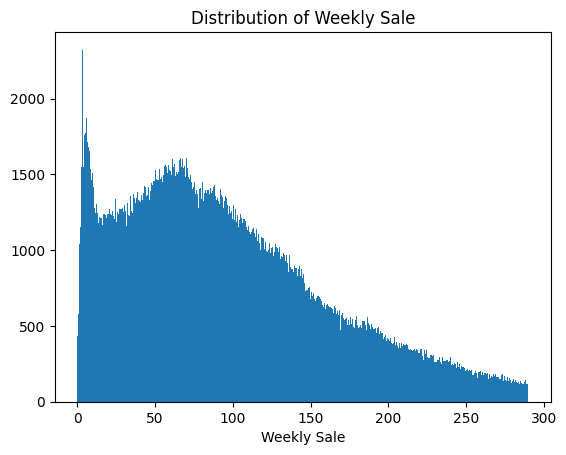

In [ ]:
tr_final['Weekly_Sales_transformed'] = np.sqrt(tr_final['Weekly_Sales'])
plt.hist(tr_final['Weekly_Sales_transformed'], bins = 500)
plt.title('Distribution of Weekly Sale')
plt.xlabel('Weekly Sale')
plt.show()

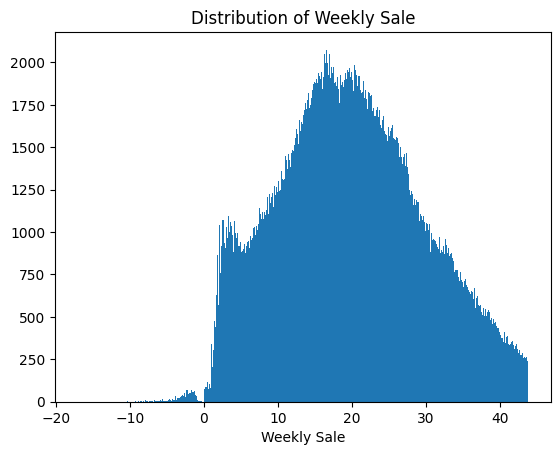

In [ ]:
tr_final['Weekly_Sales_transformed'] = np.cbrt(tr_final['Weekly_Sales'])
plt.hist(tr_final['Weekly_Sales_transformed'], bins = 500)
plt.title('Distribution of Weekly Sale')
plt.xlabel('Weekly Sale')
plt.show()

In [ ]:
tr_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_transformed
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,29.210713
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,36.988375
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,23.951360
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,34.186415
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,31.823698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,13.549975
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,17.328457
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,38.262602
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,18.961584


# **Handling NaN Value**

In [ ]:
tr_final[tr_final.isna().any(axis=1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_transformed
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,29.210713
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,36.988375
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,23.951360
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,34.186415
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,31.823698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421498,45,93,2012-10-19,2270.50,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,1,118221,13.143383
421499,45,94,2012-10-19,4655.65,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,1,118221,16.697833
421500,45,95,2012-10-19,48434.97,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,1,118221,36.451859
421501,45,97,2012-10-19,5575.90,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,1,118221,17.732569


In [ ]:
tr_final.isna().sum()

Store                            0
Dept                             0
Date                             0
Weekly_Sales                     0
IsHoliday                        0
Temperature                      0
Fuel_Price                       0
MarkDown1                   265389
MarkDown2                   304212
MarkDown3                   278882
MarkDown4                   281031
MarkDown5                   264638
CPI                              0
Unemployment                     0
Type                             0
Size                             0
Weekly_Sales_transformed         0
dtype: int64

In [ ]:
te_merged.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [ ]:
tr_final = tr_final.fillna(0)
tr_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_transformed
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,29.210713
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,36.988375
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,23.951360
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,34.186415
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315,31.823698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,13.549975
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,17.328457
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,38.262602
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221,18.961584


In [ ]:
te_final = te_merged.fillna(0)
te_final

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,1,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,1,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,1,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,1,118221


# **Handling Date**

In [ ]:
tr_final['Date'] = pd.to_datetime(tr_final['Date']).astype('int64')
te_final['Date'] = pd.to_datetime(te_final['Date']).astype('int64')

# **Separate X and Y from training dataset**

In [ ]:
tr_final.pop('Weekly_Sales')
y = tr_final.pop('Weekly_Sales_transformed')

In [ ]:
y

0         29.210713
1         36.988375
2         23.951360
3         34.186415
4         31.823698
            ...    
421565    13.549975
421566    17.328457
421567    38.262602
421568    18.961584
421569    10.249712
Name: Weekly_Sales_transformed, Length: 412722, dtype: float64

In [ ]:
x = tr_final.copy()
x

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
1,1,2,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
2,1,3,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
3,1,4,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
4,1,5,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421566,45,94,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421567,45,95,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421568,45,97,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221


# **Pass the whole dataset through Standard Scaler**

In [ ]:
scaler = StandardScaler()
y_array = np.array(y)
# y_array = y_array.reshape(-1, 1)
# y_array = scaler.fit_transform(y_array)
x_array = scaler.fit_transform(x)

te_final_array = scaler.fit_transform(te_final)
te_final_array = scaler.fit_transform(te_final_array)

In [ ]:
y

0         29.210713
1         36.988375
2         23.951360
3         34.186415
4         31.823698
            ...    
421565    13.549975
421566    17.328457
421567    38.262602
421568    18.961584
421569    10.249712
Name: Weekly_Sales_transformed, Length: 412722, dtype: float64

In [ ]:
x_array

array([[-1.665659  , -1.41255989, -1.72403997, ...,  0.07511824,
        -0.89672336,  0.25571452],
       [-1.665659  , -1.37943869, -1.72403997, ...,  0.07511824,
        -0.89672336,  0.25571452],
       [-1.665659  , -1.34631749, -1.72403997, ...,  0.07511824,
        -0.89672336,  0.25571452],
       ...,
       [ 1.77581446,  1.70083282,  1.71485807, ...,  0.37510326,
         0.60090719, -0.28721976],
       [ 1.77581446,  1.76707522,  1.71485807, ...,  0.37510326,
         0.60090719, -0.28721976],
       [ 1.77581446,  1.80019642,  1.71485807, ...,  0.37510326,
         0.60090719, -0.28721976]])

In [ ]:
te_final_array

array([[-1.65795594, -1.41372432, -1.68305502, ...,  0.56909549,
        -0.88616416,  0.24248275],
       [-1.65795594, -1.38110457, -1.68305502, ...,  0.56909549,
        -0.88616416,  0.24248275],
       [-1.65795594, -1.34848482, -1.68305502, ...,  0.56909549,
        -0.88616416,  0.24248275],
       ...,
       [ 1.77689441,  1.65253191,  1.69293182, ..., -1.31789582,
         0.60888867, -0.29909487],
       [ 1.77689441,  1.71777141,  1.69293182, ..., -1.31789582,
         0.60888867, -0.29909487],
       [ 1.77689441,  1.75039115,  1.69293182, ..., -1.31789582,
         0.60888867, -0.29909487]])

# **Rank features**

## Linear Regression

In [ ]:
lin_model = linear_model.LinearRegression()
lin_score_record = {}
feature_list = list(x)
print(feature_list)

for feature_index in range(len(feature_list)):
    column = x_array[:,feature_index].reshape(-1, 1)
    lin_model.fit(column, y_array)
    lin_score = lin_model.score(column, y_array)
    print(feature_list[feature_index], 'score:', lin_score)
    lin_score_record[feature_list[feature_index]] = lin_score

dict(sorted(lin_score_record.items(), reverse=True, key=lambda item: item[1]))

['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']
Store score: 0.01025846705811806
Dept score: 0.0006161780181603849
Date score: 6.080727539348185e-05
IsHoliday score: 1.3425095803709652e-05
Temperature score: 0.00028672877159852117
Fuel_Price score: 5.779071924338908e-07
MarkDown1 score: 0.003222929213519521
MarkDown2 score: 0.0006101498226765978
MarkDown3 score: 0.000526816319086354
MarkDown4 score: 0.0017329768879476015
MarkDown5 score: 0.002810155996216701
CPI score: 0.000865890901337707
Unemployment score: 0.0007919920485753851
Type score: 0.049081916214990584
Size score: 0.08602317794696512


{'Size': 0.08602317794696512,
 'Type': 0.049081916214990584,
 'Store': 0.01025846705811806,
 'MarkDown1': 0.003222929213519521,
 'MarkDown5': 0.002810155996216701,
 'MarkDown4': 0.0017329768879476015,
 'CPI': 0.000865890901337707,
 'Unemployment': 0.0007919920485753851,
 'Dept': 0.0006161780181603849,
 'MarkDown2': 0.0006101498226765978,
 'MarkDown3': 0.000526816319086354,
 'Temperature': 0.00028672877159852117,
 'Date': 6.080727539348185e-05,
 'IsHoliday': 1.3425095803709652e-05,
 'Fuel_Price': 5.779071924338908e-07}

## Mutual Info Regression

In [ ]:
skb = SelectKBest(mutual_info_regression, k = 3)
skb.fit(x_array, y_array)
x.columns[skb.get_support()]

Index(['Store', 'Dept', 'Size'], dtype='object')

# **Split the dataset and save to CSV file**

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(x_array, y_array, test_size=0.25, random_state=42)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(309541, 15)
(103181, 15)
(309541,)
(103181,)


In [ ]:
x_feature_list = list(x)
y_feature_list = ['Weekly_Sales_transformed']
te_feature_list = list(te_final)

x_tr = pd.DataFrame(x_tr)
x_te = pd.DataFrame(x_te)
y_tr = pd.DataFrame(y_tr)
y_te = pd.DataFrame(y_te)
te_final = pd.DataFrame(te_final_array)

x_tr.columns = x_feature_list
x_te.columns = x_feature_list
y_tr.columns = y_feature_list
y_te.columns = y_feature_list
te_final.columns = te_feature_list

In [ ]:
te_final

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095


In [ ]:
x_tr.to_csv('./x_tr.csv', index = False)
x_te.to_csv('./x_te.csv', index = False)
y_tr.to_csv('./y_tr.csv', index = False)
y_te.to_csv('./y_te.csv', index = False)
te_final.to_csv('./te_final.csv', index = False)